<br>
<div style="text-align: center;">
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width="15%">
</div>

<h1 align='center'> Text Clustering </h1>
<h2 align='center'> <font color='#0D1C2B'> Ricardo Alamo, Fengyuexin Huang, Charles Ohiri. </font> </h2>

<br>

# Table of Contents

1. [Install Required Libraries](#1.-Install-Required-Libraries)
2. [Load The Files](#2.-Load-The-Files)
3. [Cleaning Book_corpus](#3.-Cleaning-Book_corpus)
4. [KMeans](#4.-KMeans)
5. [WordClouds](#5.WordClouds)

# 1. Install Required Libraries

In [5]:
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD  #to reduce sparse matrix created by the TFID vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import string
import csv
import os
import re
from nltk.corpus import wordnet as wn
%matplotlib inline
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette

# 2. Load The Files

In [6]:
# for path in glob('T-newsgroups/Sample_newsgroup/*'):
#     print(path)
path="Sample articles"
book_corpus=[]
for files in glob(path + '\\*'):
    with open(files, 'r') as file:
        book = file.read()
        book_corpus.append(book)

In [7]:
# We will just take the first 100 articles
len(book_corpus)

100

In [8]:
#Revieweing the first article
book_corpus[0]

'\n\nI have seen a fair bit of traffic recently concerning Epilepsy and\nseizures.  I am also interested in this subject -- I have a son with\nEpilepsy and I am very active with the local association.  I posted a\nmessage like this a few months ago and received no replies, but here it\nis again.\n\nIs anyone interested in participating in a mailing list on Epilepsy and\nseizures?  This would allow us to hold discussions and share\ninformation via electronic mail.  I already run a Listserver for two\nother groups, so the mechanics would be easy.\n\nIf you are interested, mail me a note.  If I get enough replies, I will\nmake it happen and provide you with the details.\n\nBTW, I have also started a database on Epilepsy.  This is part of my\nresearch on natural language question answering systems.  Users of this\nservice are able to ask questions about Epilepsy and the program\nsearches the database and retrieves its best response.  The technology\nworks by comparing your question against

# 3. Cleaning Book_corpus

In [118]:
# Define your list of stop words
my_additional_stop_words = ['com', 'wa', 'ha','did','edu','ca'] #removing additional words that do not give meaning
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# Define a function to tokenize and lemmatize a document
def tokenize_and_lemmatize(art):
    artmod1 = re.sub(r'\d+', ' ', art)
    art_mod2 = re.sub(r"[^a-zA-Z0-9]+", ' ', artmod1)
    # Tokenize the document
    tokens = word_tokenize(art_mod2)
    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stop words
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]
    # Return the filtered tokens as a string
    return " ".join(filtered_tokens)

# Tokenize, lemmatize, and remove stop words from the documents
preprocessed_docs = [tokenize_and_lemmatize(art) for art in book_corpus]

# Define the vectorizer with stop words removed
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit and transform the vectorizer on the preprocessed documents
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)
news = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names_out())

In [119]:
# HIGH DIMENSION SPARSE MATRIX 4,617 features
pd.DataFrame(tfidf_matrix.toarray())


,0,1,2,3,4,5,6,7,8,9,...,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616
0,0.0,0.0,0.0,0.0,0.0,0.053492,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.164251,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.183369,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.264062,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
# Reviewing the popular words after cleaning 
news.sum().sort_values(ascending=False).head(20)

know       2.231474
writes     2.208250
article    2.193638
like       1.979840
don        1.832989
just       1.766890
team       1.662999
think      1.582902
time       1.529736
people     1.490334
game       1.489547
apr        1.487071
say        1.375673
koresh     1.365856
year       1.331220
steve      1.329762
thanks     1.313214
fbi        1.278331
medical    1.251059
need       1.223763
dtype: float64

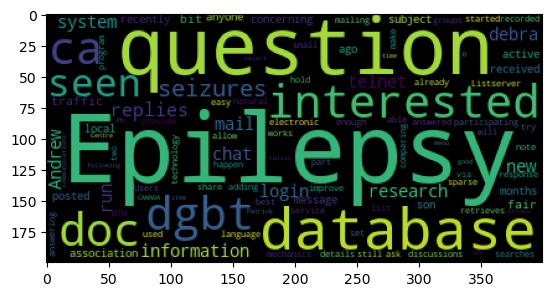

In [43]:
# Plot wordcloud

wordcloud = WordCloud().generate(book_corpus[0])

plt.imshow(wordcloud);

# 4. KMeans
- After using TF-IDF vectorizer, the transformation results in a large sparse matrix (in our case 4617 features) Clustering with high-dimensional data can be difficult, so dimension reduction is necessary.
- The model must find a balance between Total Variance explained and a reasonable clustering number.
- We decided to choose 10, it has the disadvantage of only explaining 14% of variance, but is a good selection on the elbow curve.Also, it is a reasonable clustering number since our dataset contained 100 news-articles now we are trying to separate them into 10 topics.


Number of components: 1, Explained variance ratio: 0.00
Number of components: 2, Explained variance ratio: 0.02
Number of components: 3, Explained variance ratio: 0.04
Number of components: 4, Explained variance ratio: 0.06
Number of components: 5, Explained variance ratio: 0.07
Number of components: 6, Explained variance ratio: 0.09
Number of components: 7, Explained variance ratio: 0.10
Number of components: 8, Explained variance ratio: 0.11
Number of components: 9, Explained variance ratio: 0.13
Number of components: 10, Explained variance ratio: 0.14
Number of components: 11, Explained variance ratio: 0.15
Number of components: 12, Explained variance ratio: 0.17
Number of components: 13, Explained variance ratio: 0.18
Number of components: 14, Explained variance ratio: 0.19
Number of components: 15, Explained variance ratio: 0.20
Number of components: 16, Explained variance ratio: 0.21
Number of components: 17, Explained variance ratio: 0.23
Number of components: 18, Explained vari

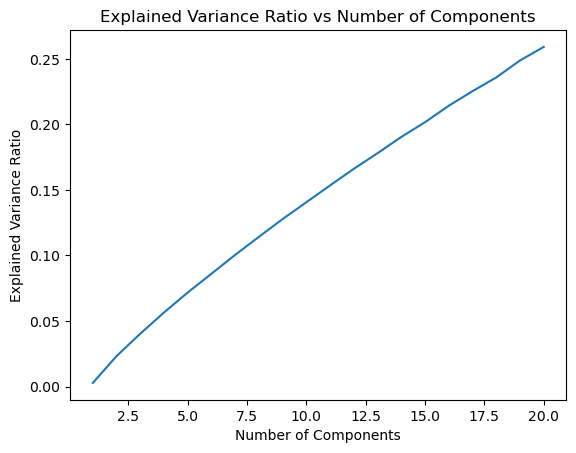

Optimal number of components: 20


In [44]:
# Define the range of number of components to test
n_components_range = range(1, 21)

# Define an empty list to store the explained variance ratios for each number of components
explained_variances = []

# Loop over the range of number of components
for n_components in n_components_range:
    
    # Initialize TruncatedSVD with the current number of components
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    
    # Fit and transform the Tfidf matrix using the current TruncatedSVD instance
    X_svd = svd.fit_transform(tfidf_matrix)
    
    # Calculate the explained variance ratio for the current TruncatedSVD instance
    explained_variance = np.sum(svd.explained_variance_ratio_)
    
    # Append the explained variance ratio to the list
    explained_variances.append(explained_variance)
    
    # Print the current number of components and the corresponding explained variance ratio
    print(f"Number of components: {n_components}, Explained variance ratio: {explained_variance:.2f}")
    
# Plot the explained variance ratios for each number of components
plt.plot(n_components_range, explained_variances)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.show()

# Find the optimal number of components based on the highest explained variance ratio
optimal_n_components = n_components_range[np.argmax(explained_variances)]
print(f"Optimal number of components: {optimal_n_components}")

In [45]:
svd = TruncatedSVD(n_components=10, random_state=42)
X_svd = svd.fit_transform(tfidf_matrix)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.14


In [46]:
#After SVD only 10 dimensions.Total variance explained: 0.14
df_svd= pd.DataFrame(X_svd)
df_svd

,0,1,2,3,4,5,6,7,8,9
0,0.164183,-0.013848,-0.051069,-0.049051,-0.056590,0.133388,0.011563,-0.123234,-0.070503,-0.102140
1,0.154324,-0.052573,-0.078333,-0.009168,0.137554,0.043735,-0.058931,-0.033812,-0.086668,-0.048772
2,0.213132,-0.060859,0.292788,0.000740,-0.001391,-0.046105,-0.006840,0.014036,-0.034126,0.076686
3,0.140261,0.016090,-0.017080,-0.022168,-0.129568,-0.013133,-0.075349,-0.024543,0.048408,0.033591
4,0.146123,-0.000745,-0.053179,0.015173,-0.076208,0.016907,0.424576,0.168076,0.034262,-0.155488
...,...,...,...,...,...,...,...,...,...,...
95,0.147371,-0.032958,-0.040181,-0.043563,-0.013802,-0.070265,0.088498,0.044722,0.091254,-0.021497
96,0.141516,-0.044903,-0.070003,-0.061876,0.077057,0.102533,-0.006531,0.050252,-0.316410,0.106162
97,0.146154,-0.048225,-0.089962,-0.015694,0.039261,0.523652,0.006645,-0.050936,0.319847,0.033920
98,0.266166,-0.001604,-0.078050,-0.070214,-0.253646,-0.124581,-0.130575,0.029384,-0.069857,-0.190455


C:\Users\Richard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


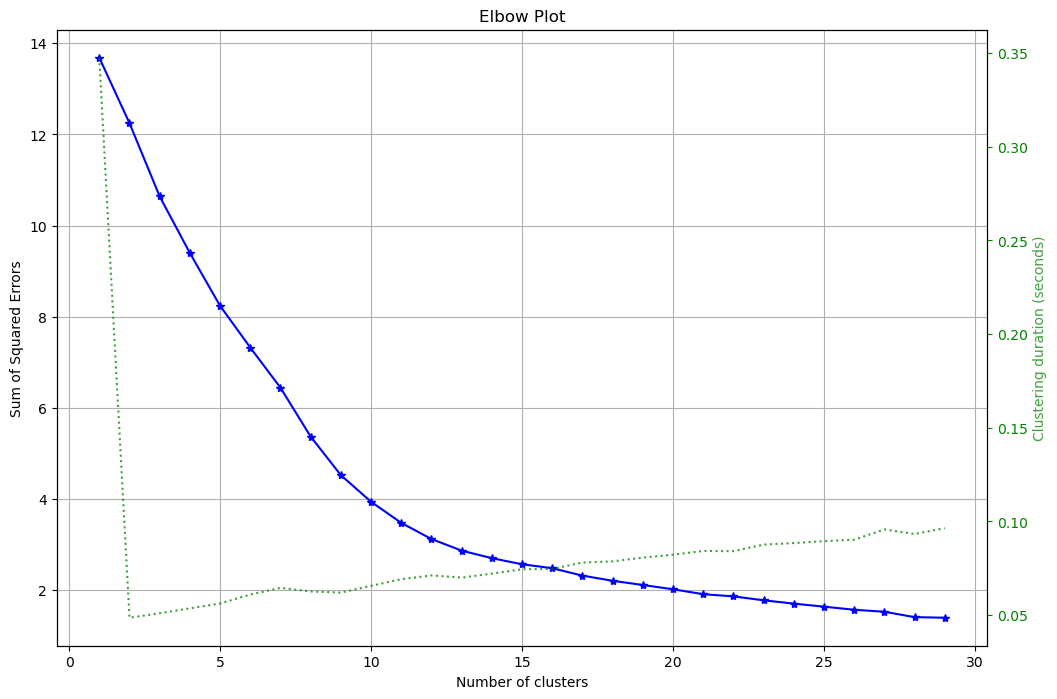

In [47]:
model= KMeans()
plot_elbow_curve(model,X_svd,cluster_ranges= range(1,30),figsize= (12,8));

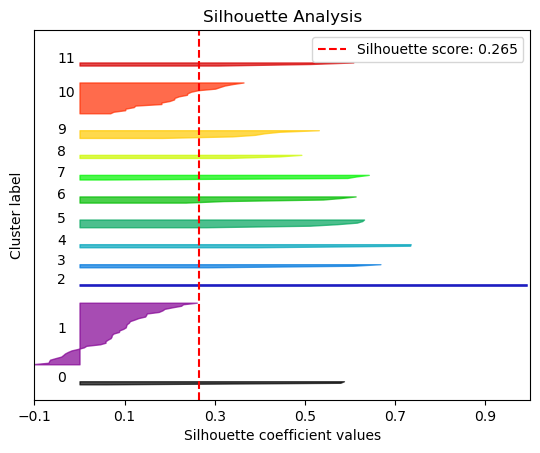

In [49]:
### looks more ore less good but let's try with less clusters
model= KMeans(12)
model.fit(X_svd)
plot_silhouette(X_svd,model.labels_);

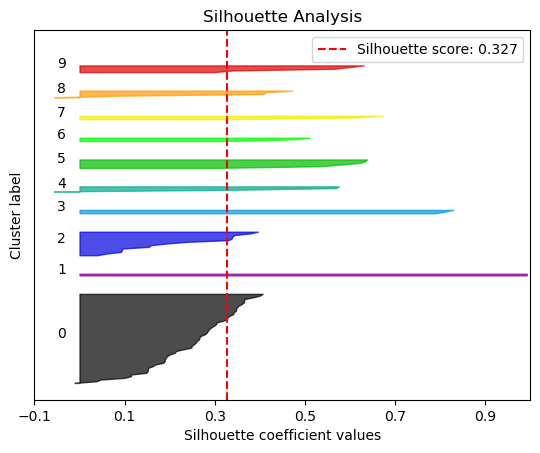

In [134]:
## Kmeans = 10  stable and have a high score 
model= KMeans(10)
model.fit(X_svd)
plot_silhouette(X_svd,model.labels_);

In [129]:
### Getting the labels of the clusters
model.labels_

array([1, 9, 6, 1, 7, 0, 0, 9, 9, 0, 8, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 9, 2, 0, 1, 0, 5, 1, 2, 0, 1, 1, 0, 6, 0,
       1, 0, 7, 0, 4, 1, 0, 6, 8, 4, 6, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 9,
       0, 7, 0, 0, 0, 7, 7, 1, 8, 0, 1, 1, 6, 0, 0, 0, 0, 9, 0, 0, 0, 4,
       5, 0, 0, 0, 3, 0, 6, 0, 0, 5, 1, 0])

In [52]:
### Returning Lables to original dataframe
news['cluster']=pd.Series(model.labels_)

In [53]:
news

,aaron,ab,abbott,abi,ability,able,absolute,absolutely,absorption,abuse,...,zinn,zl,zodiacal,zoloft,zone,zoo,zoology,zv,zyue,cluster
0,0.0,0.0,0.0,0.0,0.0,0.053492,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.164251,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,8
96,0.0,0.0,0.0,0.0,0.0,0.183369,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.264062,0.0,0.0,0.0,0.0,0.0,8
97,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5
98,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0


# 5.WordClouds

In [114]:
# Creating functions to select all the words in that cluster and plot a wordcloud
def cluster_selector(cluster_index):
    cluster_wordcloud=[]
    cluster_index= news[news['cluster'] == cluster_index].index.tolist() #getting the indices
    for i in cluster_index:
        cluster_wordcloud.append(preprocessed_docs[i])
    cluster_wordcloud = ' '.join(cluster_wordcloud) # joining the strings of all the indices
    wordcloud = WordCloud().generate(cluster_wordcloud) # generating the wordcloud
    plt.imshow(wordcloud)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

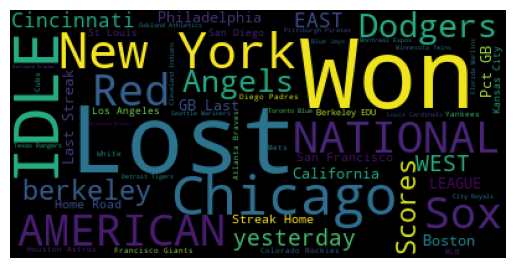

In [115]:
# Sports Cluster
cluster_selector(1)

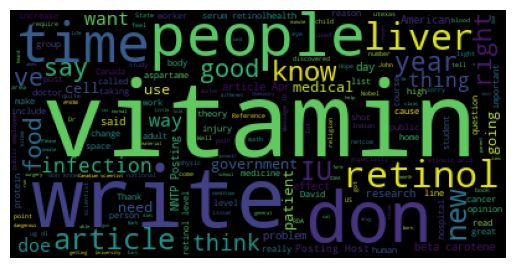

In [116]:
# Health Cluster
cluster_selector(8)

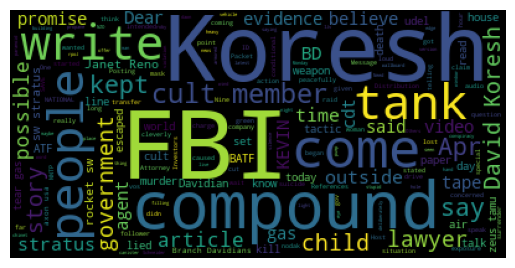

In [117]:
# Crime Cluster
cluster_selector(2)
